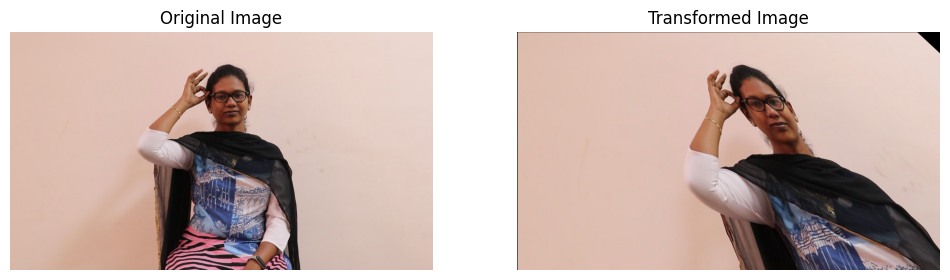

In [79]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random



In [85]:
def random_rotation(image, angle_range=(-15, 15)):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    angle = random.uniform(angle_range[0], angle_range[1])
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_image = cv2.warpAffine(image, M, (w, h))
    
    return rotated_image


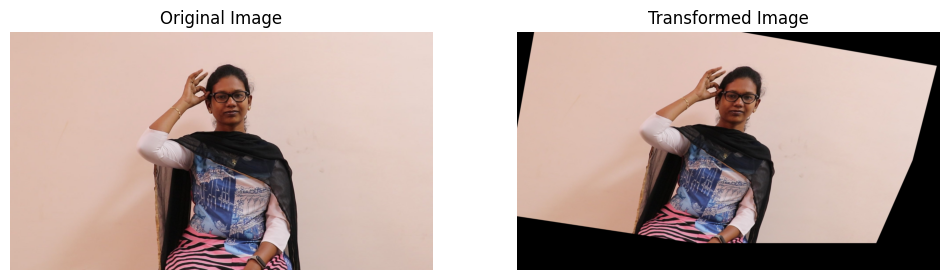

In [100]:
image = cv2.imread(image_path)

image_ro = random_rotation(image)

src_points = np.float32([
    [0, 100],    # Top-left corner
    [100, 100],   # Top-right corner
    [0, 0],   # Bottom-left corner
    [100, 0]   # Bottom-right corner
])

y = random.uniform(-1,3)
x = random.uniform(-1,3)
dst_points = np.float32([
     [0+x, 100-y],    # Top-left corner
    [100+x, 100-y],   # Top-right corner
    [0+x, 0+y],   # Bottom-left corner
    [100-x, 0+y]   # Bottom-right corner
])

M = cv2.getPerspectiveTransform(src_points, dst_points)

height, width, channels = image_ro.shape

transformed_image = cv2.warpPerspective(image_ro, M, (width, height))

# image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# transformed_image_rgb = cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB)
cv2.imwrite('C:\Projects\ISL-to-text\Word Level ISL/augment.jpg',transformed_image)

# fig, ax = plt.subplots(1, 2, figsize=(12, 6))
# ax[0].imshow(image_rgb)
# ax[0].set_title('Original Image')
# ax[0].axis('off')
# ax[1].imshow(transformed_image_rgb)
# ax[1].set_title('Transformed Image')
# ax[1].axis('off')
# plt.show()
